# Exploratory Data Analysis (EDA)

In [95]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('../data/clean/dataset.csv')

display(df.head())

/var/folders/t_/k5bhrc1x419crrfg_t8zp5nm0000gp/T/ipykernel_41365/241528515.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/clean/dataset.csv')


,date,day_of_week,month,channelGrouping,fullVisitorId,visitNumber,visitStartTime,device_deviceCategory,geoNetwork_continent,geoNetwork_country,totals_hits,totals_pageviews,totals_bounces,totals_timeOnSite,totals_transactions,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_isTrueDirect
0,2017-10-16,0,10,Organic Search,3162355547410993243,1,2017-10-17 00:00:50,desktop,Europe,Germany,1,1,1,0,0,0,(not set),google,organic,True
1,2017-10-16,0,10,Referral,8934116514970143966,6,2017-10-16 17:51:47,desktop,Americas,United States,2,2,0,28,0,0,(not set),sites.google.com,referral,True
2,2017-10-16,0,10,Direct,7992466427990357681,1,2017-10-17 00:53:33,mobile,Americas,United States,2,2,0,38,0,0,(not set),(direct),(none),True
3,2017-10-16,0,10,Organic Search,9075655783635761930,1,2017-10-16 16:04:11,desktop,Asia,Turkey,2,2,0,1,0,0,(not set),google,organic,True
4,2017-10-16,0,10,Organic Search,6960673291025684308,1,2017-10-16 21:49:12,desktop,Americas,Mexico,2,2,0,52,0,0,(not set),google,organic,True


## Basic Overview

In [54]:
df.shape

(1000000, 20)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   date                        1000000 non-null  object
 1   day_of_week                 1000000 non-null  int64 
 2   month                       1000000 non-null  int64 
 3   channelGrouping             1000000 non-null  object
 4   fullVisitorId               1000000 non-null  object
 5   visitNumber                 1000000 non-null  int64 
 6   visitStartTime              1000000 non-null  object
 7   device_deviceCategory       1000000 non-null  object
 8   geoNetwork_continent        1000000 non-null  object
 9   geoNetwork_country          1000000 non-null  object
 10  totals_hits                 1000000 non-null  int64 
 11  totals_pageviews            1000000 non-null  int64 
 12  totals_bounces              1000000 non-null  int64 
 13  totals_timeOn

In [63]:
# Number of unique customers
unique_count = df['fullVisitorId'].nunique()
print(f"Number of unique customers {unique_count}")

Number of unique customers 850351


<br>

## Date and Time Analysis (Categorical data)
### Columns: `date`, `day_of_week`, `month`

#### Distribution of visits by day of the week

In [131]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

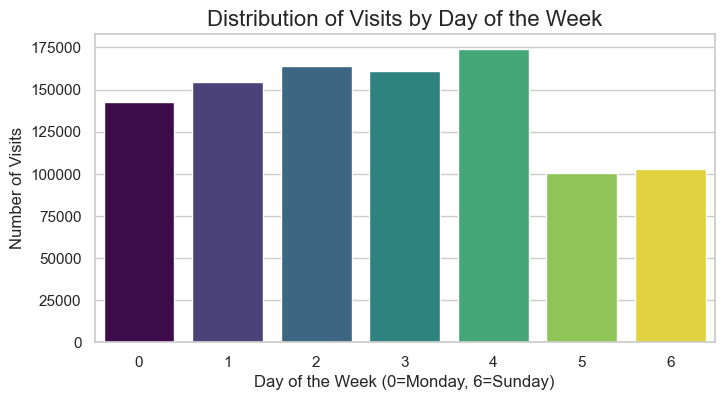

In [145]:
# Distribution of visits by day of the week
plt.figure(figsize=(8, 4))
sns.countplot(x='day_of_week', data=df, palette="viridis", hue='day_of_week', legend=False)

plt.title("Distribution of Visits by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)
plt.show()

- Visits are more frequent on Mondays through Fridays, with a peak on Fridays.
- Traffic decreases significantly on weekends (Saturdays and Sundays).

##### Average revenue by day of the week

In [115]:
# Average revenue by day of the week
avg_revenue_day = df.groupby('day_of_week')['totals_transactionRevenue'].mean()

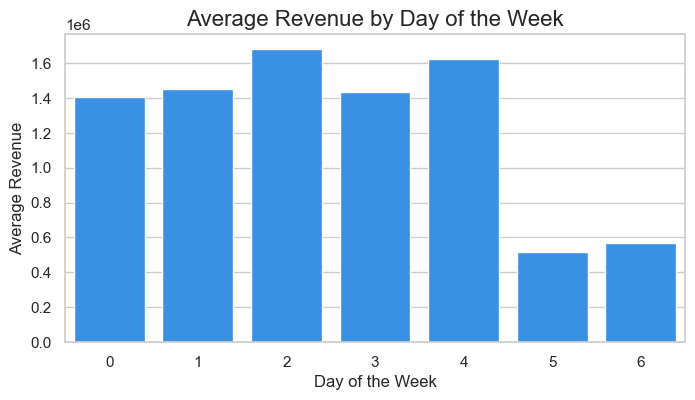

In [155]:
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_revenue_day.index, y=avg_revenue_day.values, color="dodgerblue")

plt.title("Average Revenue by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)
plt.show()

- The highest average revenue is observed on Wednesdays and Fridays.
- This suggests that midweek visits are more likely to result in purchases or higher revenue per visit, in contrast to weekends.

#### Distribution of visits by month

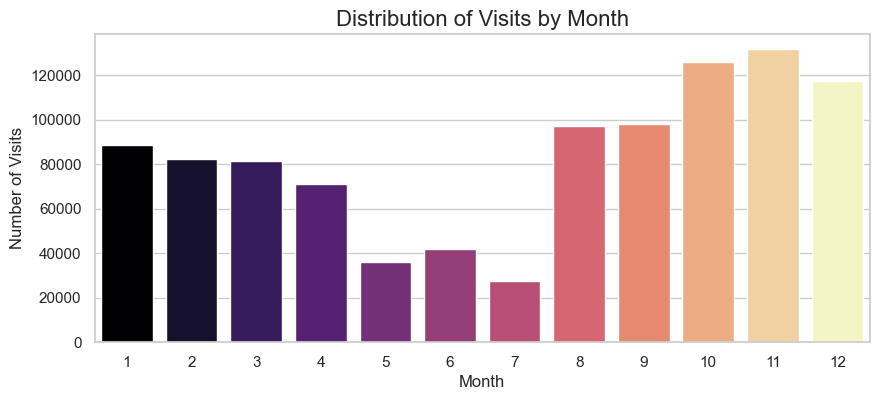

In [164]:
# Distribution of visits by month
plt.figure(figsize=(10, 4))
sns.countplot(x='month', data=df, palette="magma", hue='month', legend=False)

plt.title("Distribution of Visits by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)
plt.show()

- Visits are generallyspread across the year, with higher numbers in October, November, and December.
- There’s a notable increase in visits starting from August through December, suggesting higher traffic in the second half of the year, potentially due to holiday shopping.

##### Average revenue by month

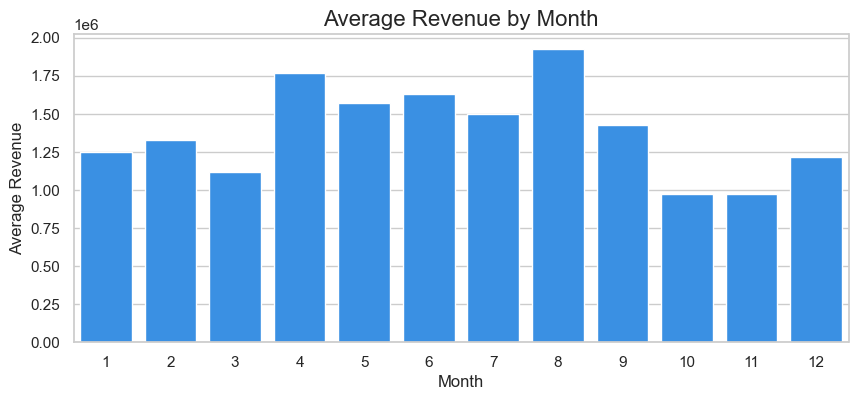

In [168]:
# Average revenue by month
avg_revenue_month = df.groupby('month')['totals_transactionRevenue'].mean()
plt.figure(figsize=(10, 4))

sns.barplot(x=avg_revenue_month.index, y=avg_revenue_month.values, color="dodgerblue")
plt.title("Average Revenue by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)
plt.show()

- Revenue peaks in **August** and again shows a rise around December.
- This pattern suggests that although traffic might be consistently high in October, November, and December, August appears to be particularly strong in terms of revenue per visit.
- August could be a key month where customers who do make purchases (likely the 20% high-spending users) contribute significantly to the overall revenue.

<br>

## Visitor and Session Information
### Columns: `fullVisitorId`, `visitNumber`, `visitStartTime`

#### Distribution of visit numbers

### Distribution of `totals_transactionRevenue`

In [ ]:
# Calculate total revenue per user
user_revenue = df.groupby('fullVisitorId')['totals_transactionRevenue'].sum()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Setting up seaborn for aesthetic plots
sns.set(style="whitegrid")

# Plot histogram of the total revenue
plt.figure(figsize=(12, 6))
sns.histplot(user_revenue[user_revenue > 0], bins=50, kde=True)
plt.title("Distribution of Total Revenue per User (Raw)")
plt.xlabel("Total Revenue")
plt.show()

# Plot histogram of log-transformed revenue
log_user_revenue = np.log1p(user_revenue[user_revenue > 0])
plt.figure(figsize=(12, 6))
sns.histplot(log_user_revenue, bins=50, kde=True)
plt.title("Distribution of Total Revenue per User (Log-Transformed)")
plt.xlabel("Log of Total Revenue")
plt.show()

#### Checking skewness and kurtosis

In [ ]:
from scipy.stats import skew, kurtosis

print("\nSkewness of Raw Transaction Revenue:", skew(df['totals_transactionRevenue'].dropna()))
print("Kurtosis of Raw Transaction Revenue:", kurtosis(df['totals_transactionRevenue'].dropna()))
print("Skewness of Log-transformed Transaction Revenue:", skew(df['log_transactionRevenue'].dropna()))
print("Kurtosis of Log-transformed Transaction Revenue:", kurtosis(df['log_transactionRevenue'].dropna()))

In [ ]:
#### Interpretation

##### Raw Transaction Revenue
**Skewness: 265.72**

- This extremely high positive skewness value indicates a very strong right skew. In other words, the distribution is heavily weighted toward lower values, with a long tail of very high revenue values.
Such high skewness is typical in e-commerce revenue data, where most users have low or zero revenue, and a few users contribute significantly more.

**Kurtosis: 107,159.75**

-This exceptionally high kurtosis value indicates extremely heavy tails, meaning that there are many extreme outliers (high-revenue users) in the data.
High kurtosis in the raw transaction revenue distribution shows that the distribution has far more extreme values than a normal distribution, which is often challenging for models to handle.
Together, these values tell us that the raw transaction revenue is highly skewed and has a large number of outliers, making it unsuitable for direct modeling.

<br>

##### Log-Transformed Transaction Revenue
**Skewness: 9.55**

- Although the skewness of the log-transformed revenue is still positive, it’s significantly lower than the skewness of the raw data. This reduction shows that log transformation has helped to reduce skewness, although some right skew still remains.

**Kurtosis: 89.57**

The kurtosis is still high but greatly reduced compared to the raw data. 
- This suggests that while there are still some extreme values, the distribution is less heavy-tailed after the log transformation.

### Revenue Analysis per User

In [ ]:
# Aggregate revenue per user, log-transform, and plot distribution
user_revenue = df.groupby('fullVisitorId')['totals_transactionRevenue'].sum()
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(user_revenue), bins=50, kde=True)
plt.title("Distribution of Total Revenue per User (Log-transformed)")
plt.xlabel("Log-transformed Total Revenue per User")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#### Interpretation
1. High Concentration at Zero or Near-Zero Revenue:

- The majority of users are clustered around a log-transformed revenue of close to zero. This means that most users have either zero revenue or very low total revenue.
- This distribution is common in e-commerce, where most customers may browse but not make a purchase, leading to a high frequency of low or zero revenue values.

In [ ]:
paying_user_revenue = user_revenue[user_revenue > 0]
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(paying_user_revenue), bins=50, kde=True)
plt.title("Distribution of Total Revenue per Paying User (Log-transformed)")
plt.xlabel("Log-transformed Total Revenue per User")
plt.ylabel("Frequency")
plt.show()

### Categorical Variable Analysis

#### Channel Grouping

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='channelGrouping', data=df, order=df['channelGrouping'].value_counts().index)
plt.title("Distribution of Channel Grouping")
plt.xlabel("Count")
plt.ylabel("Channel Grouping")
plt.show()

<br>

#### Device Category

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(y='device_deviceCategory', data=df, order=df['device_deviceCategory'].value_counts().index)
plt.title("Distribution of Device Category")
plt.xlabel("Count")
plt.ylabel("Device Category")
plt.show()

In [ ]:
<br>

#### Country Distribution - Top 10 Countries by Visit Frequency

In [ ]:
top_countries = df['geoNetwork_country'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(y='geoNetwork_country', data=df[df['geoNetwork_country'].isin(top_countries)], 
              order=top_countries)
plt.title("Top 10 Countries by Visit Frequency")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

In [ ]:
<br>

#### Correlation matrix
Calculate and visualize correlation matrix for numerical columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()